# Pymaceuticals Inc.
---

### Analysis
The current analysis looks into the relationship between mouse weight and average tumour volumn for the drugs, especially Capomulin regimen. The several plots including the linear regression finds a positive correlation between weight and tumour volumn under the campulin drug. They also exhibit that heavier mice tend to have larger tumor volumes. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(study_results, mouse_metadata, on='Mouse ID', how= 'left')

# Display the data table for preview
complete_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = complete_data['Mouse ID'].nunique()
print(f"Number of unique mice ID data:", mice_number)

Number of unique mice ID data: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice_data = complete_data[complete_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
print(f"Duplicate data of mice is ID number:")
print(duplicate_mice_data["Mouse ID"].unique())

Duplicate data of mice is ID number:
['g989']


In [14]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = complete_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [65]:
# Checking the number of mice in the clean DataFrame.
num_mice_cleaned = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice in the clean DataFrame:", num_mice_cleaned)

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats.rename(columns={'mean': 'Mean Tumor Volume', 
                              'median': 'Median Tumor Volume', 
                              'var': 'Tumor Volume Variance', 
                              'std': 'Tumor Volume Std. Dev.', 
                              'sem': 'Tumor Volume Std. Err.'}, inplace=True)


# Assemble the resulting series into a single summary DataFrame.
summary_stats.head(10)

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem')

summary_stats_advanced.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

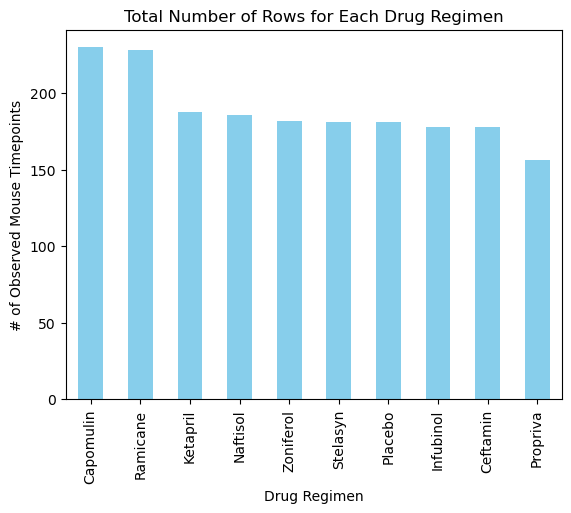

In [68]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the number of rows for each drug regimen
drug_regimen_counts = clean_data['Drug Regimen'].value_counts()

# Plot the bar plot
drug_regimen_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

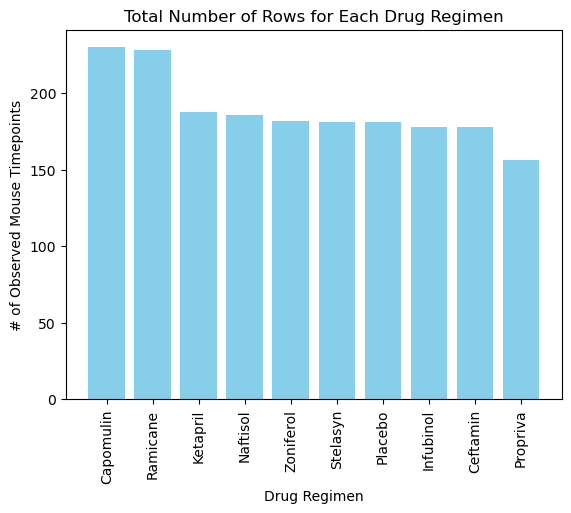

In [69]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values


plt.bar(drug_regimens, counts, color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Total Number of Rows for Each Drug Regimen')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


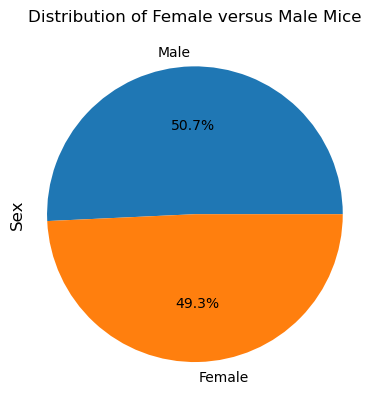

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the occurrences of each gender
gender_counts = clean_data['Sex'].value_counts()

# Plot the pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%', ylabel= '')

plt.text(-1.2, 0, "Sex", ha='center', va='center', rotation=90, fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')

# Add title
plt.title('Distribution of Female versus Male Mice')

# Show the plot
plt.show()

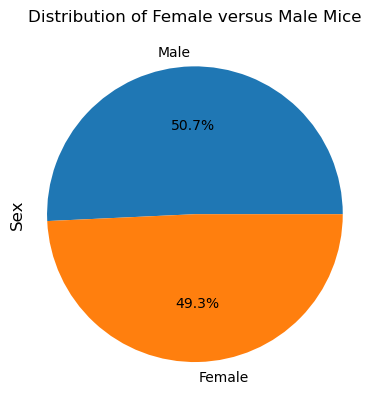

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the occurrences of each gender
gender_counts = clean_data['Sex'].value_counts()

# Extract genders and their corresponding counts
genders = gender_counts.index
counts = gender_counts.values

# Plot the pie plot
plt.pie(counts, labels=genders, autopct='%1.1f%%')

plt.text(-1.2, 0, "Sex", ha='center', va='center', rotation=90, fontsize=12)
plt.gca().set_aspect('equal', adjustable='box')

# Add title
plt.title('Distribution of Female versus Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Step 1: Get the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_volume = final_tumor_volume.reset_index(drop=True)

# Filter for the specified treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(selected_regimens)]
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [73]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each treatment regimen
for treatment in treatments:
    # Filter the final tumor volume DataFrame for the current treatment regimen
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volume data to the list
    tumor_vol_data.append(treatment_data)
    
    # Calculate the quartiles and IQR for the current treatment regimen
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Calculate the lower and upper bounds for identifying outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Determine outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


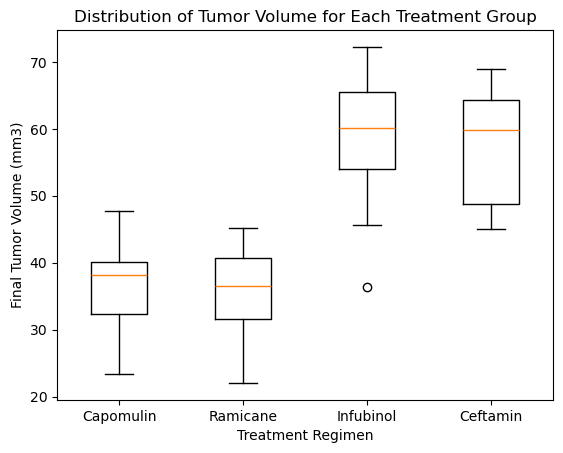

In [107]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Plot the box plot
plt.figure()
plt.boxplot(tumor_vol_data, labels=treatments)

# Add labels and title
plt.xlabel('Treatment Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

In [106]:
# Finding the required mouse id

ending_letter = '509'  # Change the letter to the desired starting letter

# Filter the Mouse IDs that start with the specified letter
mouse_ids_with_letter_s = clean_data[clean_data['Mouse ID'].str.endswith(ending_letter)]['Mouse ID'].unique()

# Print the Mouse IDs
print("Mouse IDs starting with letter '509':", mouse_ids_with_letter_s)

Mouse IDs starting with letter '509': ['l509']


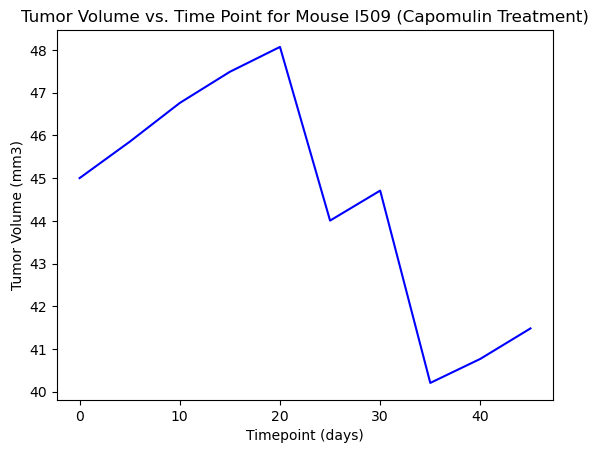

In [108]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a single mouse ID treated with Capomulin
mouse_id = 'l509'

# Plot the line plot
plt.figure()
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin Treatment)')

# Show the plot
plt.show()

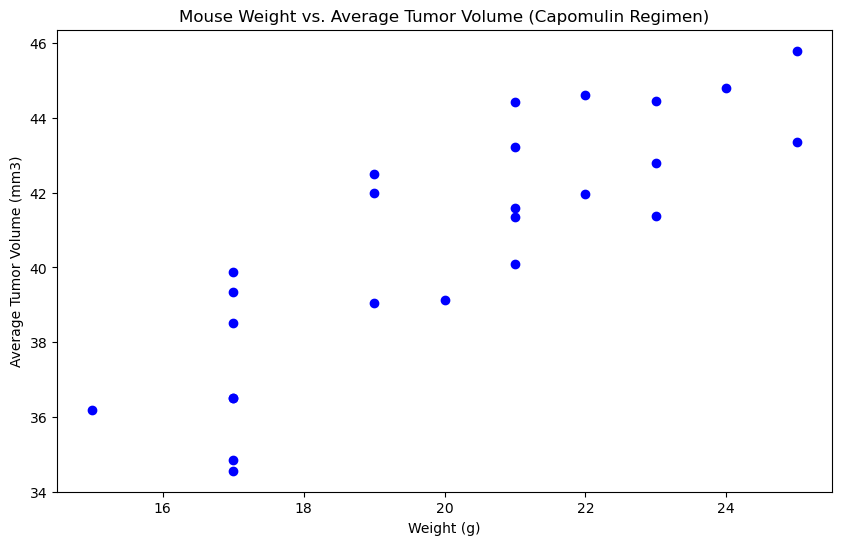

In [99]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Plot a scatter plot of mouse weight vs. the average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.8419363424694722


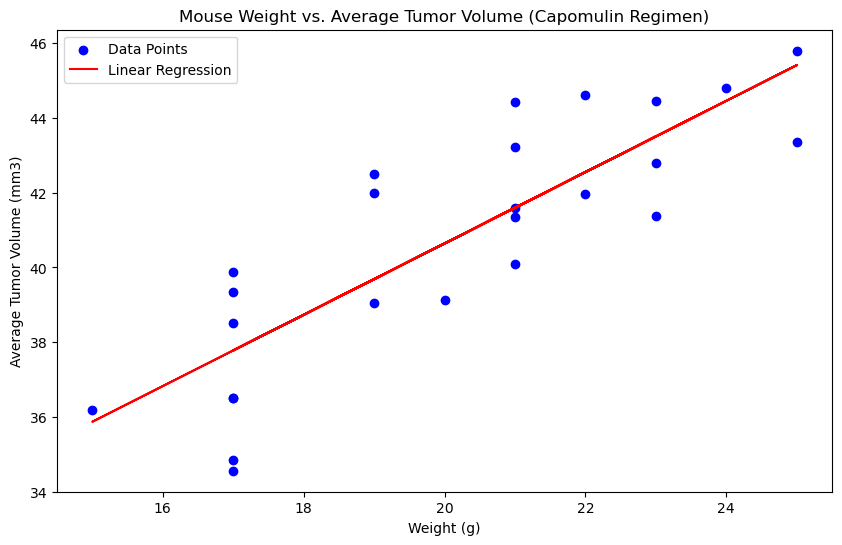

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID and calculate the average tumor volume and weight for each mouse
mouse_avg_data = capomulin_data.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

# Extract weight and tumor volume data
weight = mouse_avg_data['Weight (g)']
tumor_volume = mouse_avg_data['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation_coefficient = weight.corr(tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight, tumor_volume)

# Print the correlation coefficient
print("The correlation between mouse weight and the average tumor volume is", correlation_coefficient)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weight, tumor_volume, color='blue', label='Data Points')

# Plot the linear regression line
plt.plot(weight, slope * weight + intercept, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Add legend
plt.legend()

# Show the plot
plt.show()